In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [6]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [10]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/Self-Organizing Map A-Z/Credit_Card_Applications.csv")

In [11]:
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [ ]:
#Main Objective is to identify Outliers (Fraud)

In [12]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [17]:
pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=ec9017a9da06942313541f2a2d2e830dc79737e22a71fd1a27d480622c65a571
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [18]:
from minisom import MiniSom

In [20]:
#x and y specifies the gridsize of the Map
#input_length = no. of features
#sigma = radius of neighbourhood
som = MiniSom(x= 10, y= 10,
              input_len = 15,
              sigma = 1.0,
              learning_rate = 0.5)

#Initialising weights on X
som.random_weights_init(X)

# Training the SOM Model on X (100 iterations)
som.train_random(data = X, num_iteration = 100)

In [21]:
from pylab import bone, pcolor, colorbar, plot, show

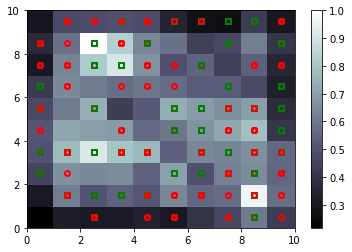

In [34]:
#Initialising the Plot Window
bone()
#Return mean interneuron distance in a matrix of all Winning Nodes
pcolor(som.distance_map().T)
colorbar()
markers = ['o' , 's']
colors = ['r', 'g']

for i, x in enumerate(X):
    #Identifying the winning node of each row
    w = som.winner(x)
    #Plotting markers on centre of winning node w[0] = x , w[1] = y, + 0.5 makes it both in the middle
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 5,
         markeredgewidth = 2)

Highest Mean Interneuron Distances are denoted by White Boxes 0 -> Far from General Clusters of Dataset -> Anomalies identified -> We need to inverse transform to find the "Features" of Frauds

In [46]:
# Mapping Winning Nodes to Customers
mappings = som.win_map(X)
#Specifically map coordinates as stated -> Anomaly Winning Nodes
frauds = np.concatenate((mappings[2,8], mappings[8,1]), axis = 0)
frauds = scaler.inverse_transform(frauds)
frauds.shape

(18, 15)

We have found 18 total potential frauds from the SOM along with their different features.